<a href="https://colab.research.google.com/github/FranciscoHernandez1998/lab4-SP1-17004812/blob/master/lab4_17004812.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
#os to read files and environment of kaggle dataset
#Numpy to convert python list to numpy array and matrix operations
#matplot to graph
#keras and TF to construct the model
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

#Usar el username de Adrian para descargar un nuevo dataset
os.environ['KAGGLE_USERNAME'] = "adriancatalan"
os.environ['KAGGLE_KEY'] = "357e7685fa71bc4c22256523f32d7731"

#Dataset used in this lab is alien vs predator
!kaggle datasets download -d pmigdal/alien-vs-predator-images

TensorFlow 2.x selected.
alien-vs-predator-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip -o 'alien-vs-predator-images.zip'

Archive:  alien-vs-predator-images.zip
  inflating: alien_vs_predator_thumbnails/data/train/alien/0.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/1.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/10.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/100.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/101.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/102.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/103.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/104.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/105.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/106.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/107.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/108.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/109.jpg  
  inflating: alien_vs_predator_thumbnails/data/train/alien/11.jpg  
 

In [0]:
train_alien_dir = "data/train/alien"
train_predator_dir = "data/train/predator"

validation_alien_dir = "data/validation/alien"
validation_predator_dir = "data/validation/predator"

num_alien_tr = len(os.listdir(train_alien_dir))
num_predator_tr = len(os.listdir(train_predator_dir))

num_alien_val = len(os.listdir(validation_alien_dir))
num_predator_val = len(os.listdir(validation_predator_dir))

total_train = num_alien_tr + num_predator_tr
total_val = num_alien_val + num_predator_val

print('total training alien images:', num_alien_tr)
print('total training predator images:', num_predator_tr)

print('total validation alien images:', num_alien_val)
print('total validation predator images:', num_predator_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training alien images: 347
total training predator images: 347
total validation alien images: 100
total validation predator images: 100
--
Total training images: 694
Total validation images: 200


In [0]:
#variables to use in preprocessing of the dataset and training the network
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
#definition of the generators
#ImageDataGenerator preprocess the images to perform:
#Decode contents of these images and convert it into proper grid format as per their RGB content.
#and Convert them into floating point tensors.
#Reescale the 0-255 values
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [0]:
#Now flow_from_directory loads the images and applies rescaling and resize into the required dimension
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory="data/train",
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 694 images belonging to 2 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory="data/validation",
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


Found 200 images belonging to 2 classes.


In [0]:
#next returns a batch in form (x_train, y_train) where x_train is features and y_train its labels
sample_training_images, _ = next(train_data_gen)

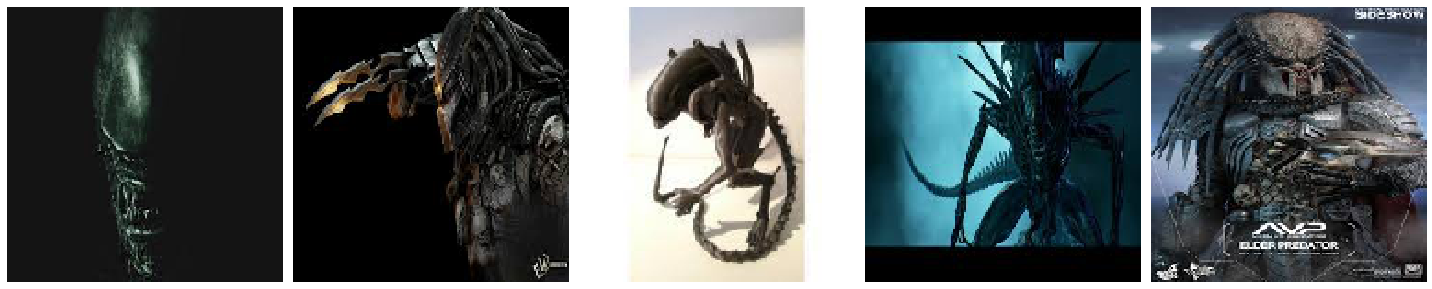

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])


In [0]:
#Model of three convolution blocks, with a max pool layer in each of them.
#Fully connected layer with 512 units on top of it acivated by relu act. funct.
#Sigmoid to output a class probabilities on binary classification.
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [0]:
#ADAM optimizer and binary cross entropy loss function.
#Pass metrics arg to observe the training and validation accuracy for each epoch
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
#view all the layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [0]:
#train the model witch the fit_generator method of ImageDataGenerator class
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 1 steps
Epoch 1/15
5/5 [==============================] - 14s 3s/step - loss: 1.4828 - accuracy: 0.5389 - val_loss: 0.9472 - val_accuracy: 0.4453
Epoch 2/15
5/5 [==============================] - 13s 3s/step - loss: 0.7520 - accuracy: 0.4859 - val_loss: 0.6907 - val_accuracy: 0.4531
Epoch 3/15
5/5 [==============================] - 13s 3s/step - loss: 0.6921 - accuracy: 0.5265 - val_loss: 0.6919 - val_accuracy: 0.5547
Epoch 4/15
5/5 [==============================] - 13s 3s/step - loss: 0.6919 - accuracy: 0.4982 - val_loss: 0.6842 - val_accuracy: 0.5547
Epoch 5/15
5/5 [==============================] - 13s 3s/step - loss: 0.6874 - accuracy: 0.5000 - val_loss: 0.6680 - val_accuracy: 0.5547
Epoch 6/15
5/5 [==============================] - 13s 3s/step - loss: 0.6745 - accuracy: 0.5353 - val_loss: 0.6503 - val_accuracy: 0.5859
Epoch 

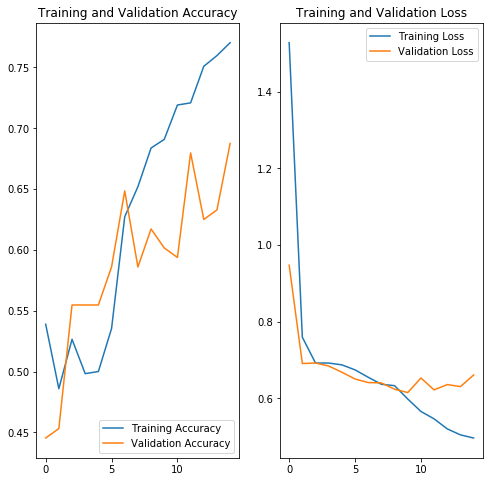

In [0]:
#Visualize the results after training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [0]:
#Overfitting: Large margin between training accuracy and validation accuracy, only 77% of accuracy

#Small number of training examples. Model learns sometimes from noises or unwanted details
#Model will have a difficult time generalizing on a new dataset.

#Data augmentatiton and adding dropout to the model
#this will augment the dataset to have sufficient number of training examples
#Random transformation are made to do this.

#Horizontal_flip augmentation
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)


In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory="data/train",
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))


Found 694 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


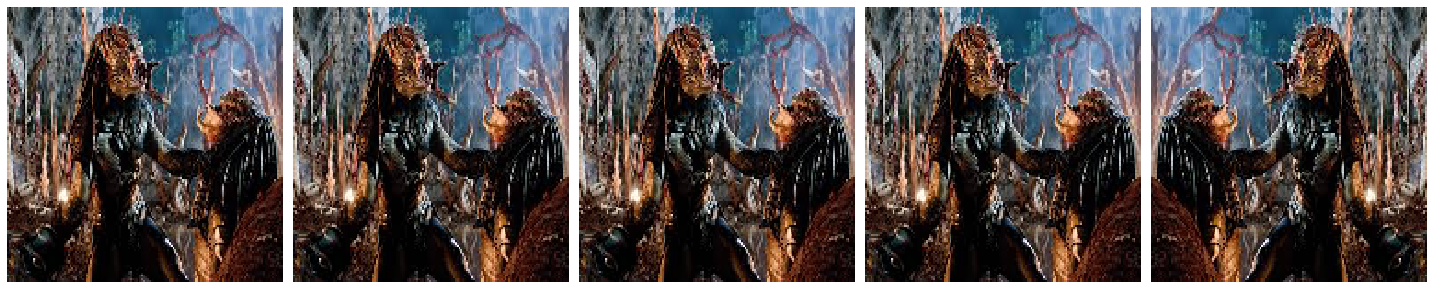

In [0]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)


In [0]:
#Rotation of 45 degrees
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory="data/train",
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 694 images belonging to 2 classes.


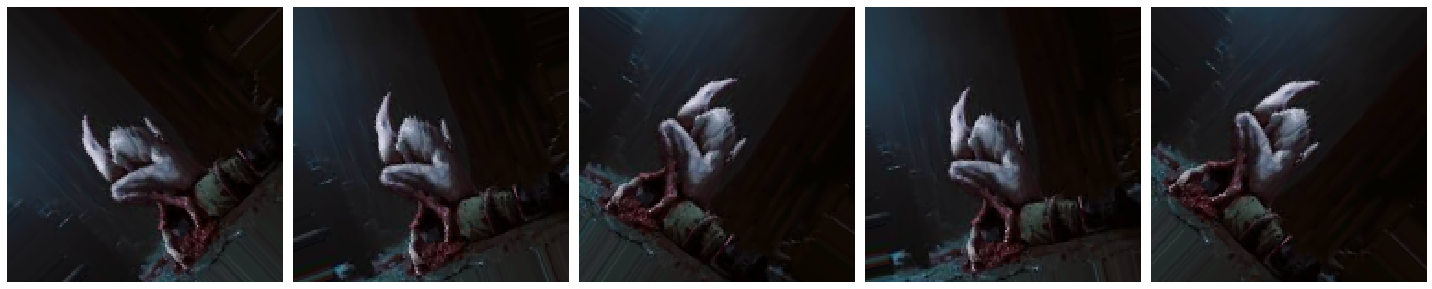

In [0]:
plotImages(augmented_images)


In [0]:
#Zoom augmentation up to 50%  randomly
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 


In [0]:
#Applying all the previous augmentations to the training images
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory="data/train",
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 694 images belonging to 2 classes.


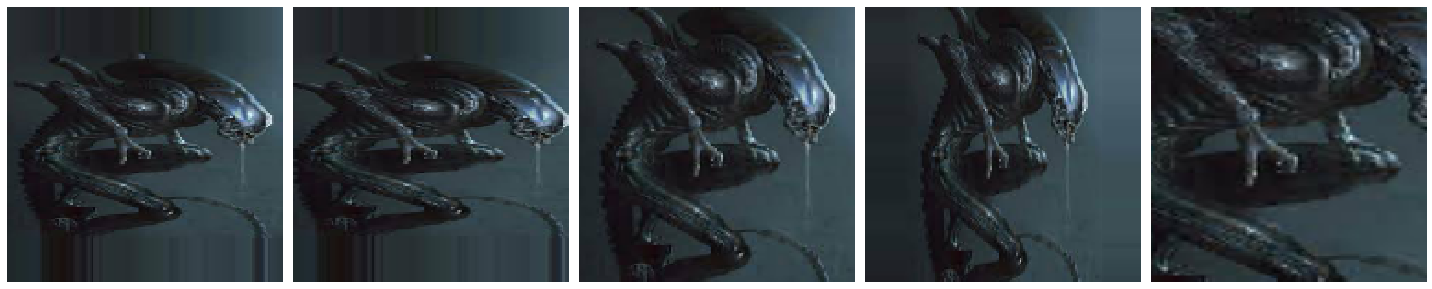

In [0]:
plotImages(augmented_images)


In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory="data/train",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')


Found 694 images belonging to 2 classes.


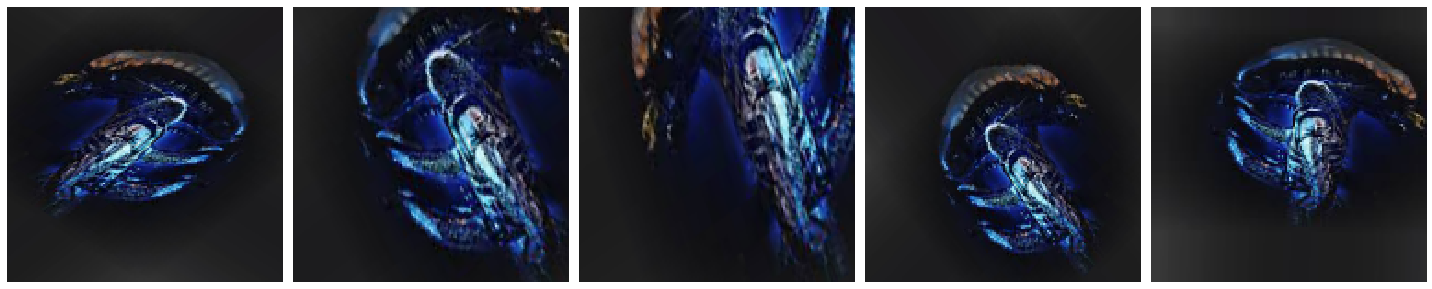

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


In [0]:
#Only training images suffered data augmentation
#validation images are only reescaled.

image_gen_val = ImageDataGenerator(rescale=1./255)


In [0]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory="data/validation",
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')


Found 200 images belonging to 2 classes.


In [0]:
#Dropout: Regularization that forces thw weights in the network to take only small values
# this makes the distribution of weight values more regular and it reduces overfitting 
#on small training examples

#it takes a percentage to know how much drop out. It means it kills n% of the output units in each training epoch

#this case is 20%, it randomly set 20% of the neurons to zero during each training epoch
#this helps to avoid overfitting on the training dataset
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [0]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [0]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 1 steps
Epoch 1/15
5/5 [==============================] - 19s 4s/step - loss: 1.7722 - accuracy: 0.5281 - val_loss: 0.6706 - val_accuracy: 0.5469
Epoch 2/15
5/5 [==============================] - 17s 3s/step - loss: 0.7755 - accuracy: 0.5212 - val_loss: 0.6944 - val_accuracy: 0.4844
Epoch 3/15
5/5 [==============================] - 17s 3s/step - loss: 0.6975 - accuracy: 0.4876 - val_loss: 0.6801 - val_accuracy: 0.5234
Epoch 4/15
5/5 [==============================] - 17s 3s/step - loss: 0.6664 - accuracy: 0.6025 - val_loss: 0.6670 - val_accuracy: 0.6328
Epoch 5/15
5/5 [==============================] - 17s 3s/step - loss: 0.6535 - accuracy: 0.5866 - val_loss: 0.6548 - val_accuracy: 0.6406
Epoch 6/15
5/5 [==============================] - 17s 3s/step - loss: 0.6340 - accuracy: 0.6502 - val_loss: 0.6395 - val_accuracy: 0.6328
Epoch 7/15
5/5 [==============================] - 17s 3s/step - loss: 0.6126 - acc

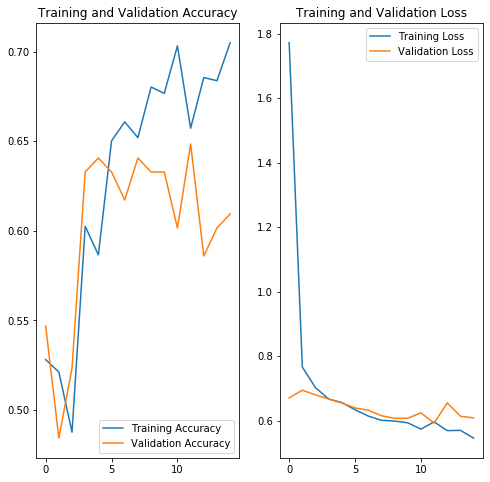

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
